In [1]:
import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import defaultdict


peoples=['이재명','이낙연','안철수','윤석열','박영선','나경원','오세훈','우상호']
people_dic_list=[]
word_list=[]

for name in peoples:

    with open(f'../people_2/2월_{name}_날짜별_키워드_순위.csv','r',encoding='cp949') as f:
        
        dic=defaultdict(int)
        file=csv.reader(f)
        next(file)
        next(file)
        for line in file:
            lines=line[2:]
            for n in range(0,len(lines)-1,2):
                word_list.append(lines[n])
                dic[lines[n]]+=int(lines[n+1])
        people_dic_list.append(dic)
word_list=set(word_list)
print(word_list)

ValueError: invalid literal for int() with base 10: '뉴스'

In [4]:
import os
import csv
import pandas as pd

from collections import defaultdict
# pandas 보기 사이즈 설정
pd.set_option('display.max_row', 500)
pd.set_option('display.max_column', 100)
    
def main(name,date):
    day_dic={}
    word_vocab=[]
    # 각 파일에 접근
    with open(f'../people_2/2월_{name}_날짜별_키워드_순위.csv','r',encoding='cp949') as f:
        file=csv.reader(f)
        next(file)
        for num,line in enumerate(file):
            lines = line[1:]
            if num == 0:
                for day in lines:
                    day_dic[day]={}
            elif num==1:
                pass
                for cnt,key in enumerate(day_dic.keys()):
                    day_dic[key]['count']=int(lines[cnt])
            else :
                if num % 2 == 0:
                    word_list=lines
                    for word in word_list:
                        word_vocab.append(word)
                if num % 2 == 1:
                    for cnt,key in enumerate(day_dic.keys()):
                        if word_list[cnt]!=' ':
                            day_dic[key][word_list[cnt]]=int(lines[cnt])
    
    day_df=defaultdict(list)


    for key in day_dic[date].keys():
        day_df[key].append(day_dic[date][key])
    
    df=pd.DataFrame(day_df.values(),index=day_df.keys(),columns=[date])
    
    return df

In [37]:
date ='20210201'
name = '박영선'
df = main(name,date)
count=df.iloc[0][0]
df=df.iloc[1:]
df=df[df[date]>3]
point=df.values

In [38]:
df_PCA=df.copy()
points=df_PCA.values
k=4

# training k-means
kmeans = KMeans(n_clusters=k,init='k-means++').fit(points)

# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [39]:
df_PCA['label']=labels
df_PCA=df_PCA.sort_values(by=['label'], axis=0)
df_PCA

,20210201,label
서울,119,0
후보,91,0
시장,84,0
추진,5,1
김진애,5,1
뉴스,5,1
비판,5,1
교통,5,1
모노톤,5,1
진보,4,1


In [40]:
# 정규화
scaler = StandardScaler()
X=scaler.fit_transform(point)
X

array([[ 4.46518556],
       [ 3.24438777],
       [ 2.93918832],
       [ 2.32878943],
       [ 1.71839054],
       [ 1.32599125],
       [ 1.23879141],
       [ 1.06439172],
       [ 0.67199243],
       [ 0.41039291],
       [ 0.32319307],
       [ 0.27959314],
       [ 0.23599322],
       [ 0.10519346],
       [ 0.06159354],
       [ 0.06159354],
       [ 0.01799362],
       [-0.0256063 ],
       [-0.06920622],
       [-0.11280614],
       [-0.11280614],
       [-0.11280614],
       [-0.15640607],
       [-0.24360591],
       [-0.28720583],
       [-0.37440567],
       [-0.37440567],
       [-0.37440567],
       [-0.37440567],
       [-0.41800559],
       [-0.41800559],
       [-0.46160551],
       [-0.46160551],
       [-0.46160551],
       [-0.50520543],
       [-0.50520543],
       [-0.50520543],
       [-0.50520543],
       [-0.50520543],
       [-0.50520543],
       [-0.54880535],
       [-0.54880535],
       [-0.54880535],
       [-0.54880535],
       [-0.54880535],
       [-0

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
Y = scaler.fit_transform(point)
Y

array([[1.        ],
       [0.75652174],
       [0.69565217],
       [0.57391304],
       [0.45217391],
       [0.37391304],
       [0.35652174],
       [0.32173913],
       [0.24347826],
       [0.19130435],
       [0.17391304],
       [0.16521739],
       [0.15652174],
       [0.13043478],
       [0.12173913],
       [0.12173913],
       [0.11304348],
       [0.10434783],
       [0.09565217],
       [0.08695652],
       [0.08695652],
       [0.08695652],
       [0.07826087],
       [0.06086957],
       [0.05217391],
       [0.03478261],
       [0.03478261],
       [0.03478261],
       [0.03478261],
       [0.02608696],
       [0.02608696],
       [0.0173913 ],
       [0.0173913 ],
       [0.0173913 ],
       [0.00869565],
       [0.00869565],
       [0.00869565],
       [0.00869565],
       [0.00869565],
       [0.00869565],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [42]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

ax = sns.scatterplot(x='PC1', y='PC2', data = principalDF) 
sns.regplot(x=principalDF['PC1'], y=principalDF['PC2'], fit_reg=False)

display()

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

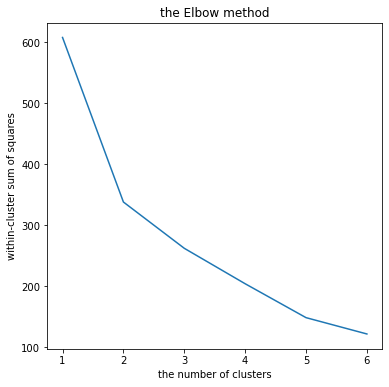

In [41]:
cluster_range = range(1,7)
cluster_errors = []
for n in cluster_range:
    cluster = KMeans(n)
    cluster.fit(X)
    cluster_errors.append(cluster.inertia_)

plt.figure(figsize = (6,6))
plt.plot(cluster_range, cluster_errors)
plt.title('the Elbow method')
plt.xlabel('the number of clusters')
plt.ylabel('within-cluster sum of squares')
display()

In [43]:
km = KMeans(n_clusters = 5)
km.fit(X)

centroids = km.cluster_centers_ 
labels= km.labels_
df_PCA['label'] = labels

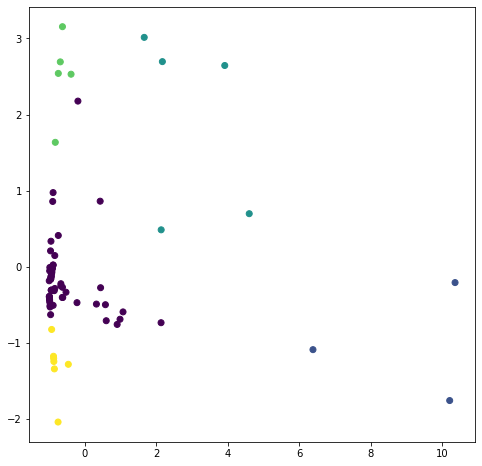

In [45]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

plt.figure(figsize = (8,8))
plt.scatter('PC1', 'PC2', data = principalDF, c = labels)

display()

In [47]:
df_PCA.groupby(['label'])['안철수'].count()

label
0    56
1     3
2     5
3     5
4     7
Name: 안철수, dtype: int64

In [49]:
df_PCA[df_PCA['label'] == 1]

,이재명,이낙연,안철수,윤석열,박영선,나경원,오세훈,우상호,label
서울,2413,4831,9300,2167,10871,10572,8893,9555,1
후보,0,1234,9229,219,11473,11102,9400,10062,1
시장,448,533,5548,0,7393,7345,6447,7058,1


In [51]:
data_ = df_PCA[df_PCA['label'] != 1]

X = df_PCA[peoples]
print('X shape:', X.shape) 

X = X.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

km = KMeans(n_clusters = 4)
km.fit(X)

centroids = km.cluster_centers_ 
labels= km.labels_
df_PCA['label'] = labels

X shape: (76, 8)


In [52]:
df_PCA

,이재명,이낙연,안철수,윤석열,박영선,나경원,오세훈,우상호,label
총장,0,0,0,2647,0,0,0,0,3
부산,0,816,0,0,0,0,0,0,1
재난,0,1138,0,0,0,0,0,0,1
지원,0,1141,0,0,0,0,0,0,1
취재,1007,0,0,0,0,0,0,0,1
간담회,0,603,0,0,0,0,0,0,1
출마,0,0,917,0,0,348,206,746,1
공직자,0,0,0,239,0,0,0,0,1
정책,0,0,0,0,0,0,0,503,1
부총리,0,480,0,0,0,0,0,0,1


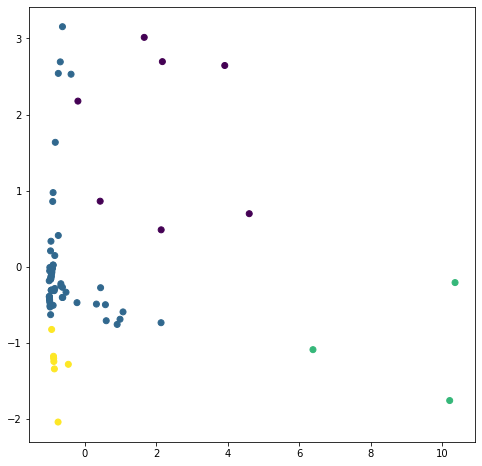

In [53]:
plt.figure(figsize = (8,8))
plt.scatter('PC1', 'PC2', data = principalDF, c = labels)